<a href="https://colab.research.google.com/github/Ghost7600/ComputacaoCientifica/blob/main/Projeto_Filtro_Rejeita_Faixa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



**Alunos: Fabio Avelino e Kenner Marqueti Couto**

1 Identificação do sinal espúrio

2 Requisitos de projeto

3 Projeto de um filtro FIR

4 Implementação do filtro FIR no Python e em hardware (STM32F4) - testar com ruído branco/varredura E áudio corrompido

5 Projeto de um filtro IIR

6 Implementação do filtro IIR no Python e em hardware (STM32F4) - testar com ruído branco/varredura E áudio corrompido

7 Projeto de um filtro notch

8 Implementação do filtro notch no Python e em hardware (STM32F4) - testar com ruído branco/varredura E áudio corrompido



---



#1 - Identificação do sinal expúrio

Utilizando o ocenaudio podemos analisar o audio selecionamos um momento de silêncio da fala para melhor identificar o sinal espúrio, e utilizamos a análise de FFT com elevado número de bins para identificar a frequência do sinal expúrio. Apenas visualizando o espectro podemos verificar que o ruído estará próximo dos 3KHz.

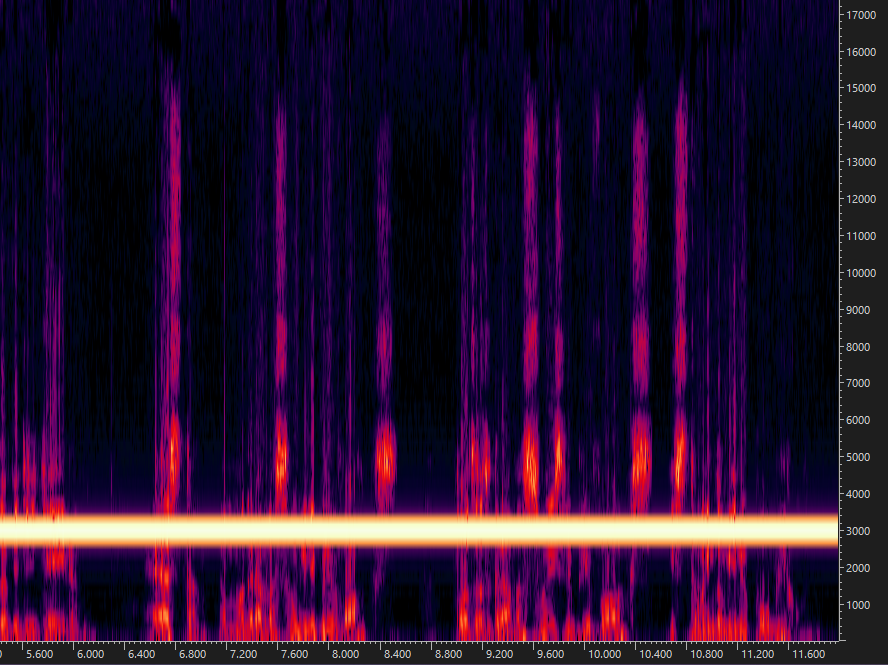

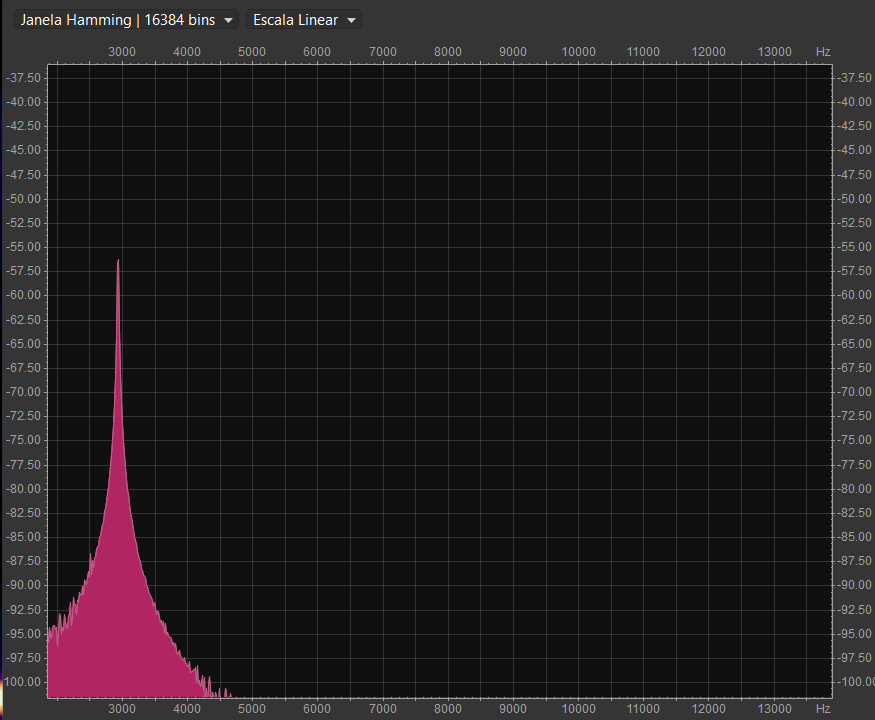

Vemos que o sinal expúrio se encontra em aproximadamente 3kHz, observando um pouco mais de perto notamos na verdade que ele está em cerca de 2920 Hz, devemos portanto projetar um filtro rejeita faixa para a região ao redor desta frequência.


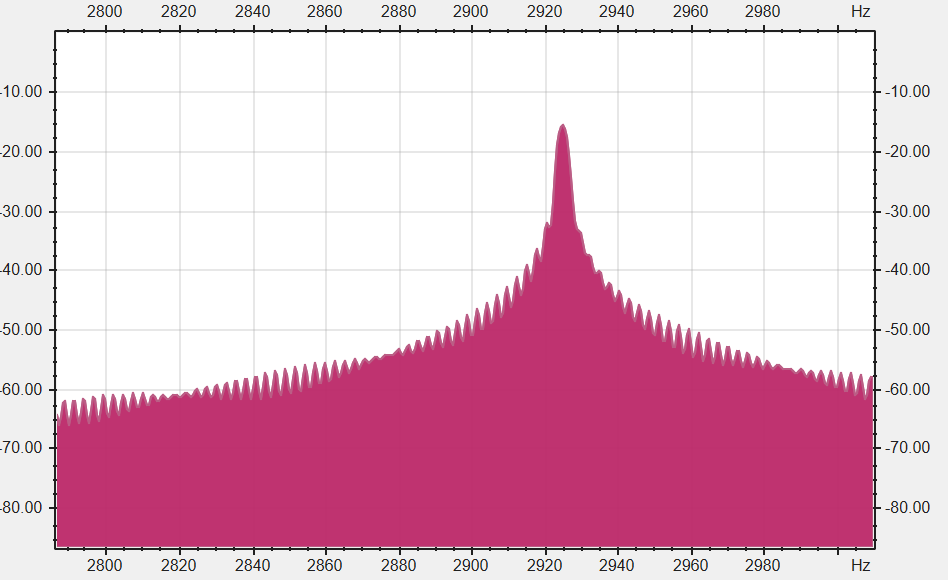



# 2 - Requisitos de Projeto

Tendo como objetivo remover ou reduzir o ruído expúrio, e tendo em mente que filtro deve rejeitar a frequência do ruído mais uma certa banda de rejeição, define-se essas bandas, e por consequência uma ordem, cujo valor mínimo será inversamente proporcional à largura da banda de transição.

#3 - Projeto do Filtro FIR

Para rejeitar o ruído em ~2900Hz, utilizou-se de um filtro rejeita-faixa com frequencia de amostragem de 48Khz.

Para o projeto do filtro foi utlizado o PyFDA, mantendo a ordem do filtro inferior a 200 buscando mantê-lo compatível com o kit STM32F4Discovery .

Buscando otimizar a banda de transição, atenuação e observando a limitação de numero de coeficientes, obteve-se um filtro de ordem 161, com Fc1 = 2.8 KHz e Fc2 = 3.2 KHz, mantendo aproximadamente 600 Hz de banda de transição para cada lado.

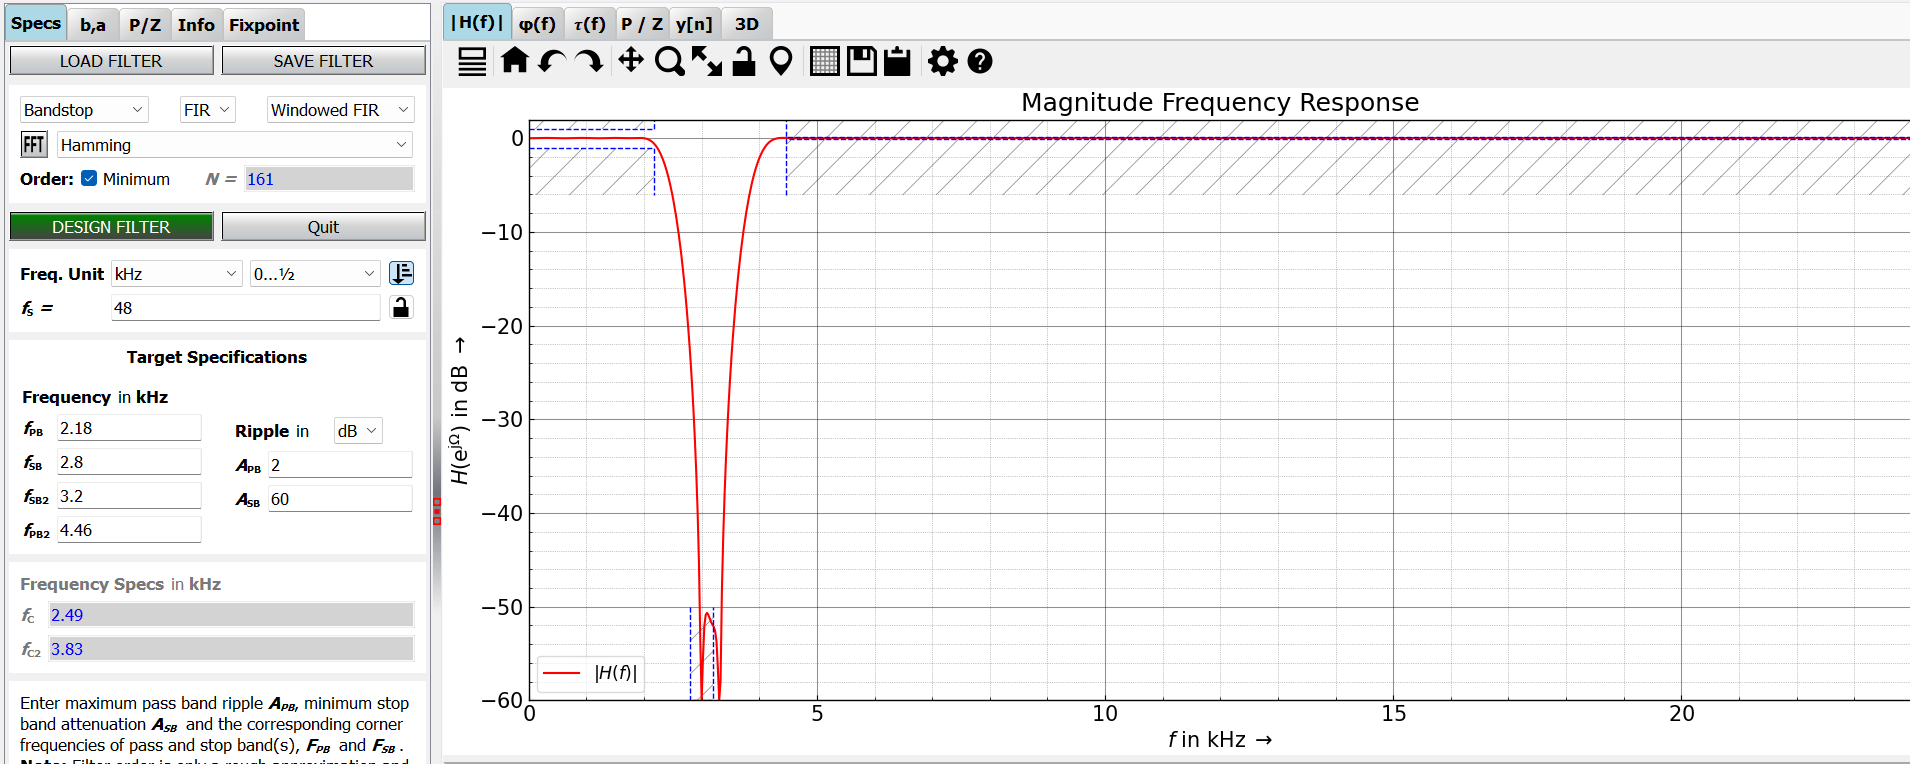

Para fácil visualização do filtro, gerou-se ruído branco no Ocenaudio, visto na imagem abaixo, e conectou-se a saída de som do computador à entrada da placa, e a entrada de microfone à saída para captação do sinal filtrado.

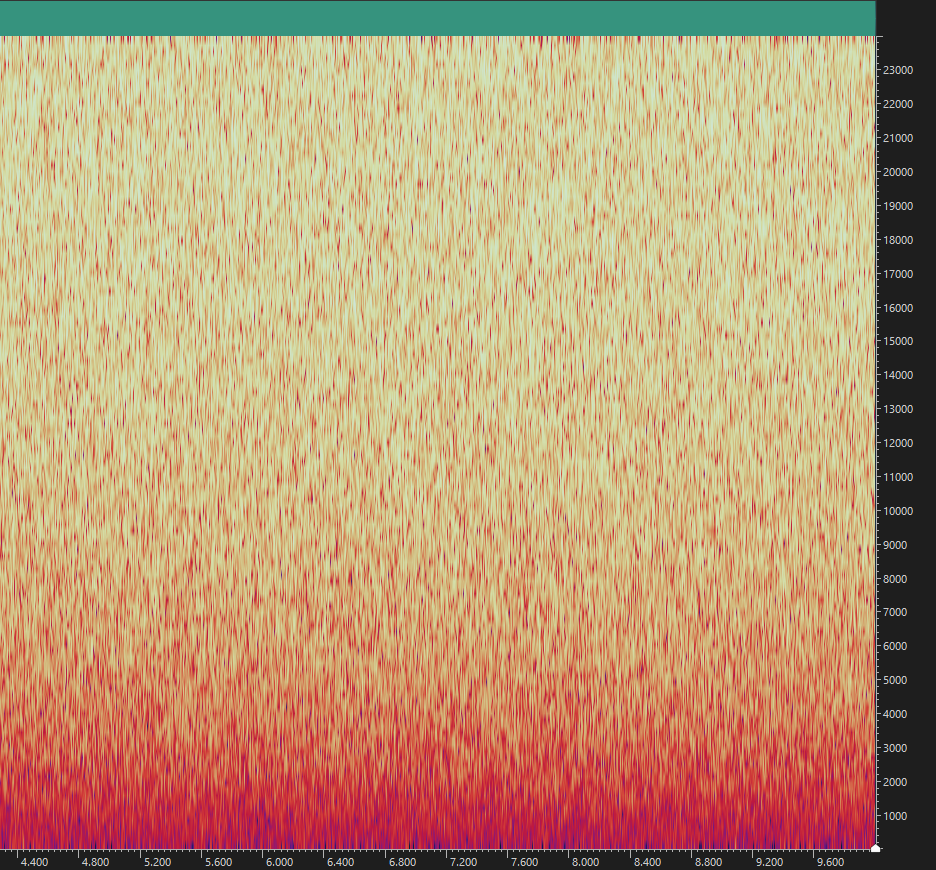

Abaixo observa-se o ruído branco filtrado, com uma nítida atenuação na banda desejada

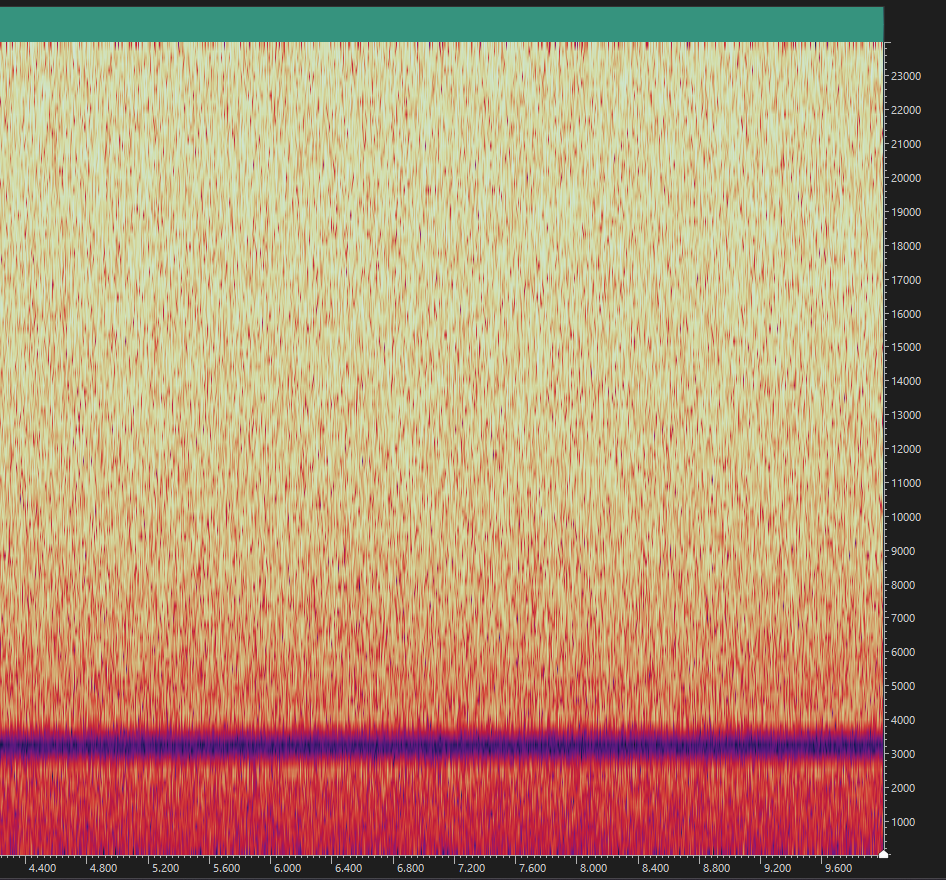

Para melhor análise da atenuação do filtro, utilizou-se da análise FFT do ruído branco filtrado, vista abaixo.

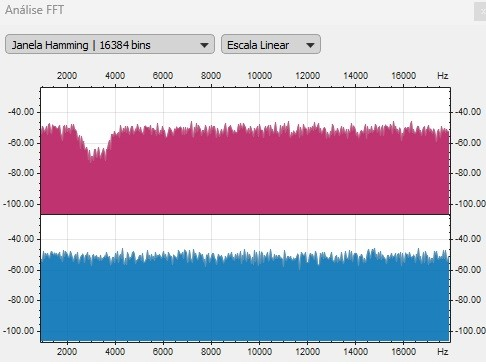

Observa-se uma grande banda de transição e uma atenuação de aproximadamente -20dB, muito abaixo do projetado. Utilizando-se então de um sweep observou-se INSERIR IMAGEM

Aplicando o filtro ao áudio fornecido, é possível observar uma atenuação do ruído pelo spectograma comparando os canais.

# Refazer Medidas utilizando sempre o Áudio Inteiro.

Fazer código apenas com valores inteiros (int16).